<a href="https://colab.research.google.com/github/FernandoBRdgz/diplomado_ds_mod4/blob/main/4.3%20Redes%20Neuronales%20Convolucionales/4.3.2%20Dise%C3%B1o%20de%20CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
!nvidia-smi

Sat Apr 22 15:12:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_val, y_val) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


###  Visualización de datos

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
single_image = X_train[0]

In [ ]:
single_image.shape

(28, 28)

In [ ]:
# single_image

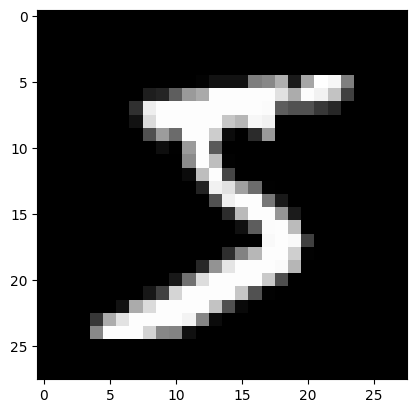

In [ ]:
plt.imshow(single_image, cmap='gray');

### Preprocesamiento de datos

Primero debemos asegurarnos de que las etiquetas sean comprensibles para nuestra CNN.

#### Análsis de variable objetivo

In [ ]:
print(y_train.shape)
y_train

(60000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
print(y_val.shape)
y_val

(10000,)


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Note que las etiquetas son literalmente categorías de números. Se necesita traducir esto para que sea "una codificación en caliente (one-hot encoding)" para que la CNN pueda entender, de lo contrario, pensará que se trata de una especie de problema de regresión en un eje continuo. Afortunadamente, Keras tiene una función fácil de usar para esto:

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_example = to_categorical(y_train)

In [ ]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_example.shape

(60000, 10)

In [ ]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [ ]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_cat_val = to_categorical(y_val, num_classes=10)

In [ ]:
y_cat_val

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Procesamiento

#### Normalización de imágenes

In [ ]:
single_image.min(), single_image.max()

(0, 255)

In [ ]:
X_train = X_train/255
X_val = X_val/255

In [ ]:
scaled_single = X_train[0]

In [ ]:
scaled_single.min(), scaled_single.max()

(0.0, 1.0)

In [ ]:
scaled_single.shape

(28, 28)

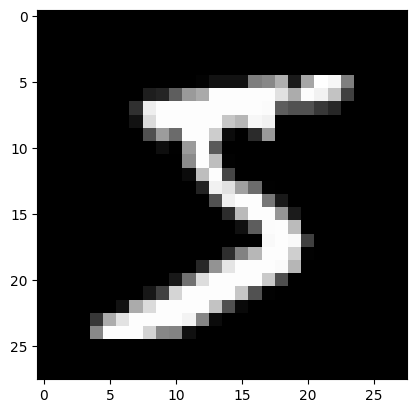

In [ ]:
plt.imshow(scaled_single, cmap='gray');

#### Redimensionamiento

En este punto, el conjunto de entrenamiento cuenta con 60,000 imágenes almacenadas en forma tensorial de 28 por 28 píxeles.

Es viable tratar esta estructura de datos para una CNN, pero necesitamos agregar una dimensión más para afirmar que estamos tratando con 1 canal RGB (ya que técnicamente las imágenes están en blanco y negro, solo muestran valores de 0-255 en un solo canal), una imagen en color tendría 3 dimensiones.

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_val.shape

(10000, 28, 28)

Cambiar la forma para incluir la dimensión del canal (en este caso, 1 canal)

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_val = X_val.reshape(10000, 28, 28, 1)

In [ ]:
X_val.shape

(10000, 28, 28, 1)

### Diseño de arquitectura

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

# CAPA CONVOLUTIONAL
model.add(Conv2D(filters=32, kernel_size=(4,4), padding='valid', input_shape=(28, 28, 1), activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# APLANADO/DESENROLLADO DE IMÁGENES DE 28x28 a 784 ANTES DE LA CAPA FINAL
model.add(Flatten())

# 128 NEURONAS EN LA CAPA OCULTA DENSA (PUEDE USTED CAMBIAR ESTE NÚMERO DE NEURONAS)
model.add(Dense(128, activation='relu'))

# LA ÚLTIMA CAPA ES EL CLASIFICADOR DE 10 CLASES POSIBLES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

### Entrenamiento de modelo

In [ ]:
%%time
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_val, y_cat_val), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 18s 4ms/step - loss: 0.1412 - accuracy: 0.9582 - val_loss: 0.0652 - val_accuracy: 0.9800
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0453 - accuracy: 0.9857 - val_loss: 0.0393 - val_accuracy: 0.9869
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0401 - val_accuracy: 0.9861
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0204 - accuracy: 0.9932 - val_loss: 0.0422 - val_accuracy: 0.9871
CPU times: user 31.6 s, sys: 3.95 s, total: 35.5 s
Wall time: 38.7 s


### Evaluación de modelo

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.141154,0.958167,0.065201,0.9800
1,0.045308,0.985733,0.039271,0.9869
2,0.029331,0.990767,0.040115,0.9861
3,0.020433,0.993167,0.042181,0.9871


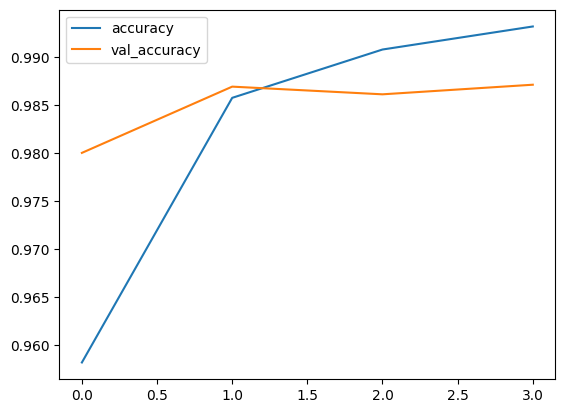

In [ ]:
losses[['accuracy','val_accuracy']].plot();

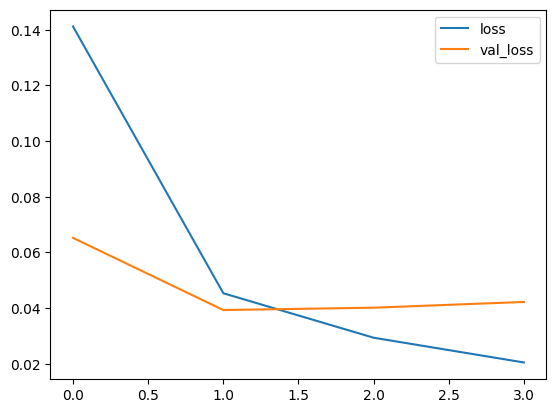

In [ ]:
losses[['loss','val_loss']].plot();

In [ ]:
print(model.metrics_names)
print(model.evaluate(X_val, y_cat_val, verbose=0))

['loss', 'accuracy']
[0.04218104109168053, 0.9871000051498413]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions_ = model.predict(X_val)
predictions = np.argmax(predictions_, axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_val, predictions

(array([7, 2, 1, ..., 4, 5, 6], dtype=uint8), array([7, 2, 1, ..., 4, 5, 6]))

In [ ]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
confusion_matrix(y_val, predictions)

array([[ 971,    1,    1,    0,    0,    2,    3,    1,    1,    0],
       [   0, 1134,    1,    0,    0,    0,    0,    0,    0,    0],
       [   1,    1, 1024,    0,    1,    0,    0,    4,    1,    0],
       [   0,    1,    6,  998,    0,    2,    0,    1,    2,    0],
       [   0,    0,    2,    0,  973,    0,    1,    0,    0,    6],
       [   2,    0,    0,    6,    0,  883,    1,    0,    0,    0],
       [   2,    5,    0,    0,    1,    6,  940,    0,    4,    0],
       [   0,    4,    5,    0,    1,    0,    0, 1017,    0,    1],
       [   2,    2,    7,    0,    2,    2,    0,    3,  953,    3],
       [   0,    3,    0,    1,   11,    5,    0,    7,    4,  978]])

In [ ]:
import seaborn as sns

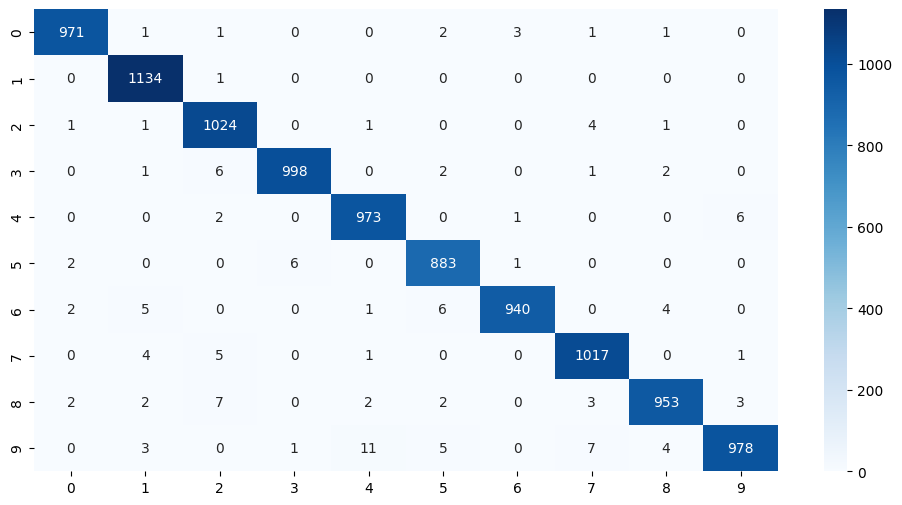

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_val, predictions), annot=True, cmap="Blues", fmt=".4g");

### Predección de modelo

In [ ]:
my_img = X_val[87]

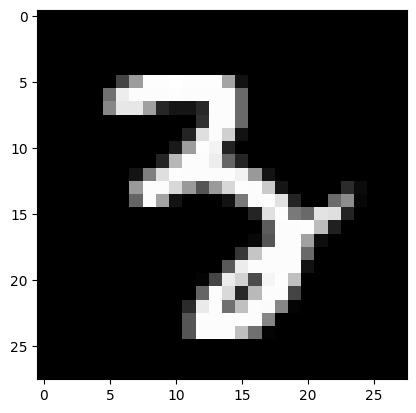

In [ ]:
plt.imshow(my_img.reshape(28,28), cmap='gray');

In [ ]:
# Recordatorio --> (numero de registros, ancho, alto, canales)
np.argmax(model.predict(my_img.reshape(1, 28, 28, 1)))

1/1 [==============================] - 0s 47ms/step


3